In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [65]:
data = pd.read_parquet('data/02_Encuesta.parquet')



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   response_id                            110 non-null    object        
 1   start_response                         110 non-null    datetime64[ns]
 2   complete_response                      110 non-null    datetime64[ns]
 3   age                                    110 non-null    category      
 4   sex                                    110 non-null    category      
 5   years_studying                         110 non-null    int64         
 6   degree                                 110 non-null    category      
 7   infrastructure_score                   110 non-null    category      
 8   notice_infrastructure_improvement      110 non-null    category      
 9   frecuency_digital_systems              110 non-null    category  

# Graficos

In [66]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("viridis")

In [67]:
def add_percentage(ax, total):
    for c in ax.containers:
        ax.bar_label(
            c,
            fmt=lambda x: f'{(x/total)*100:.1f}%',
            label_type='edge'
        )

def get_tagged_percentages(counts):
    return [f"{x} {round(counts[x] / counts.sum() * 100, 1)}%"  for x in counts.index]

## Perfil Demográfico de la Muestra

Text(0, 0.5, 'conteo')

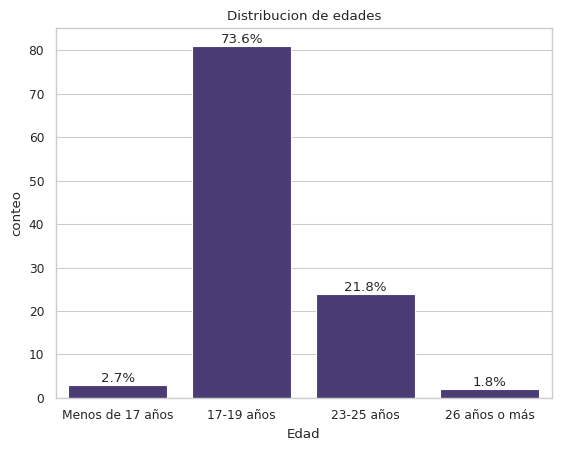

In [68]:
ax = sns.countplot(data=data, x='age')
add_percentage(ax, len(data))
plt.title("Distribucion de edades")
plt.xlabel("Edad")
plt.ylabel("conteo")


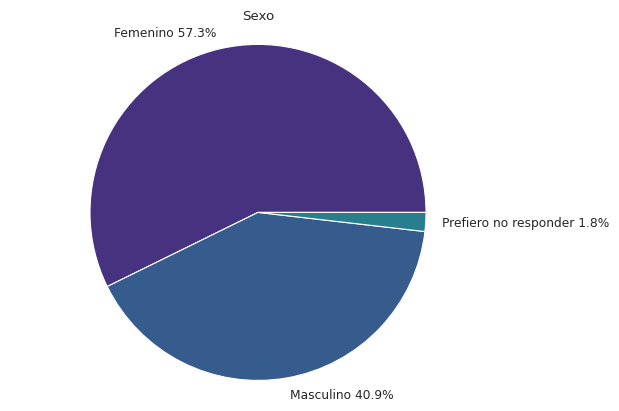

In [69]:
sex_counts = data['sex'].value_counts()

plt.pie(sex_counts, labels=get_tagged_percentages(sex_counts))
plt.title('Sexo')
plt.axis('equal') 

plt.show()

Text(0, 0.5, 'conteo')

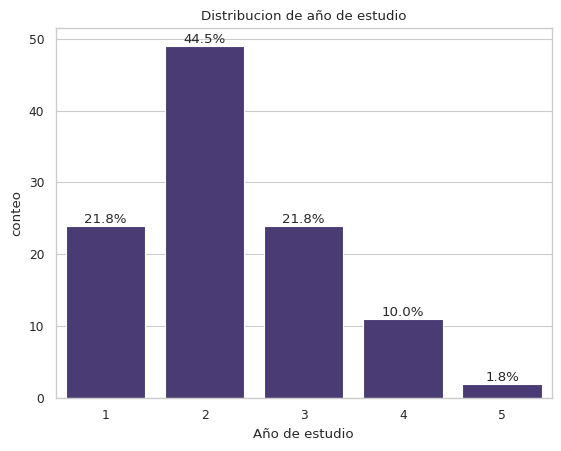

In [70]:
ax = sns.countplot(data=data, x='years_studying')
add_percentage(ax, len(data))
plt.title("Distribucion de año de estudio")
plt.xlabel("Año de estudio")
plt.ylabel("conteo")

Text(0.5, 0, 'Conteo')

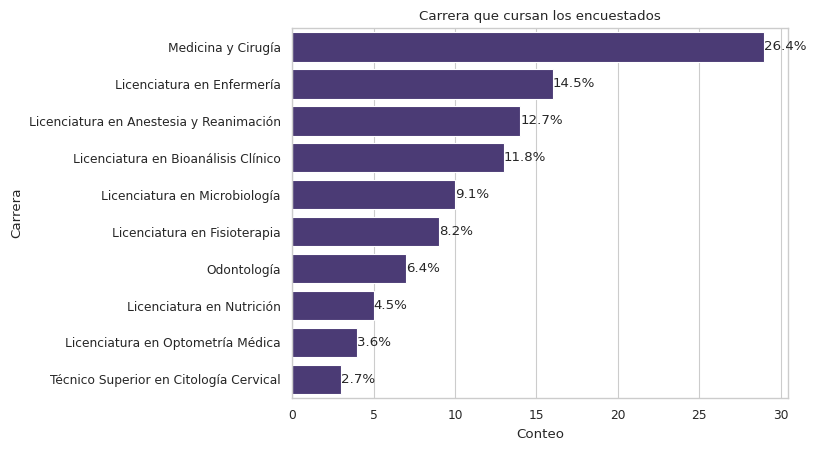

In [71]:
ax = sns.countplot(
    data=data,
    y='degree',
    order=data['degree'].value_counts().index
)
add_percentage(ax, len(data))
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

Text(0.5, 0, 'Conteo')

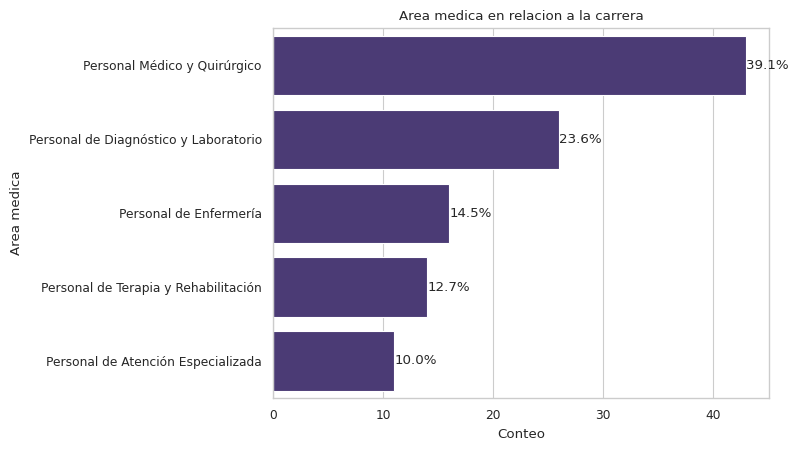

In [85]:
ax = sns.countplot(
    data=data,
    y='degree_category',
    order=data['degree_category'].value_counts().index
)
add_percentage(ax, len(data))
plt.title("Area medica en relacion a la carrera")
plt.ylabel("Area medica")
plt.xlabel("Conteo")

## Observación de Avances

Text(0, 0.5, 'conteo')

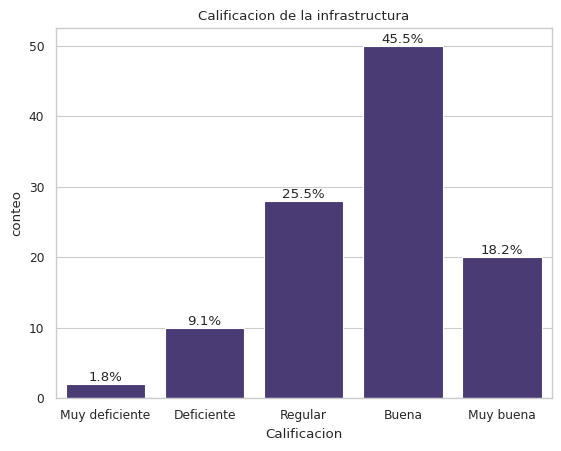

In [86]:
ax = sns.countplot(data=data, x='infrastructure_score')
add_percentage(ax, len(data))
plt.title("Calificacion de la infrastructura")
plt.xlabel("Calificacion")
plt.ylabel("conteo")

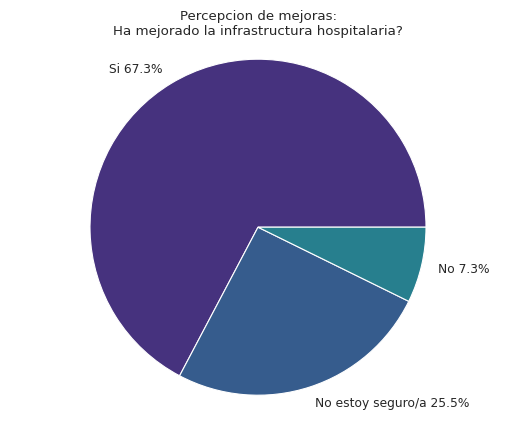

In [81]:
counts = data['notice_infrastructure_improvement'].value_counts()

plt.pie(counts, labels=get_tagged_percentages(counts))
plt.title('Percepcion de mejoras:\nHa mejorado la infrastructura hospitalaria?')
plt.axis('equal') 

plt.show()

Text(0, 0.5, 'Frecuencia')

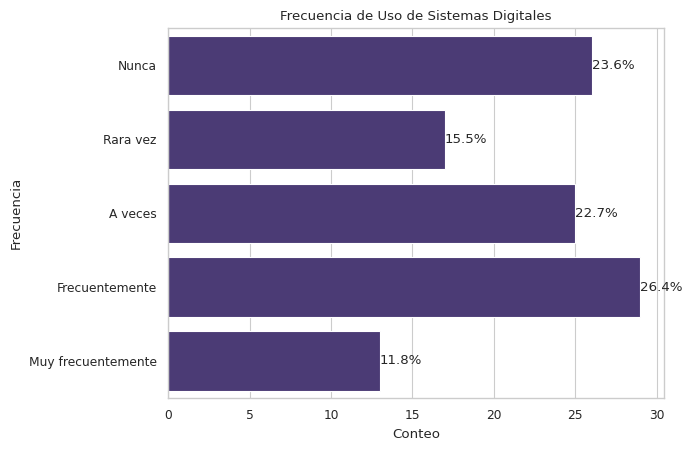

In [91]:
ax = sns.countplot(data=data, y='frecuency_digital_systems')
add_percentage(ax, len(data))
plt.title("Frecuencia de Uso de Sistemas Digitales")
plt.xlabel("Conteo")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Patologias')

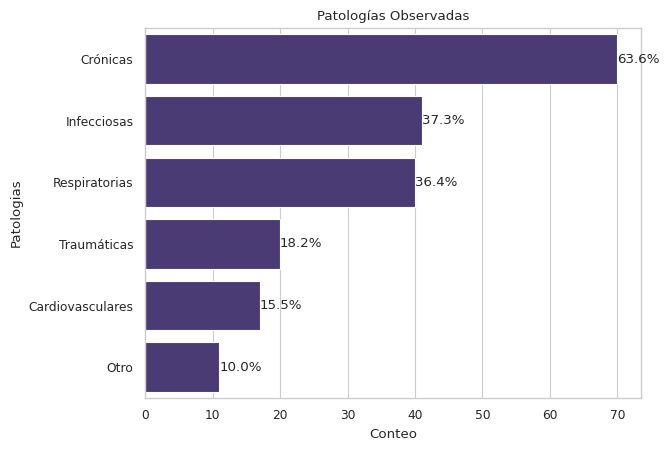

In [110]:
data_subset = data[["pathologies"]].explode('pathologies')
ax = sns.countplot(data=data_subset, y='pathologies', order=data_subset["pathologies"].value_counts().index)
add_percentage(ax, len(data))
plt.title("Patologías Observadas")
plt.xlabel("Conteo")
plt.ylabel("Patologias")

## Nivel de Conocimiento